In [1]:
!nvidia-smi

Mon Sep 14 01:47:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
os.chdir('/content/drive/My Drive/Google Colab/MatThan4')
!ls

darknet.zip  MatThan4_YoloV4_608x608_training.ipynb


In [3]:
!unzip darknet.zip

Streaming output truncated to the last 5000 lines.
  inflating: darknet/data/data/xemay1648.jpg  
  inflating: darknet/data/data/xemay1648.txt  
  inflating: darknet/data/data/xemay1649.jpg  
  inflating: darknet/data/data/xemay1649.txt  
  inflating: darknet/data/data/xemay165.jpg  
  inflating: darknet/data/data/xemay165.txt  
  inflating: darknet/data/data/xemay1650.jpg  
  inflating: darknet/data/data/xemay1650.txt  
  inflating: darknet/data/data/xemay1651.jpg  
  inflating: darknet/data/data/xemay1651.txt  
  inflating: darknet/data/data/xemay1652.jpg  
  inflating: darknet/data/data/xemay1652.txt  
  inflating: darknet/data/data/xemay1653.jpg  
  inflating: darknet/data/data/xemay1653.txt  
  inflating: darknet/data/data/xemay1654.jpg  
  inflating: darknet/data/data/xemay1654.txt  
  inflating: darknet/data/data/xemay1655.jpg  
  inflating: darknet/data/data/xemay1655.txt  
  inflating: darknet/data/data/xemay1656.jpg  
  inflating: darknet/data/data/xemay1656.txt  
  inflating

In [6]:
os.chdir('/content/drive/My Drive/Google Colab/MatThan4/darknet')
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  src
backup		darknet_images.py	LICENSE		       video_yolov3.sh
build		darknet.py		Makefile	       video_yolov4.sh
build.ps1	darknet_video.py	net_cam_v3.sh	       yolov4.conv.137
build.sh	data			net_cam_v4.sh	       yolov4-obj.cfg
cfg		image_yolov3.sh		README.md
cmake		image_yolov4.sh		results
CMakeLists.txt	include			scripts


In [7]:
!make

mkdir -p ./obj/
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./

In [8]:
!ls

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh	       yolov4.conv.137
cmake		image_yolov3.sh		obj		       yolov4-obj.cfg
CMakeLists.txt	image_yolov4.sh		README.md


In [9]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train data/obj.data yolov4-obj.cfg yolov4.conv.137 -map -dont_show > yolov4_lisenceplate.log

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128

In [ ]:
# Danh sách các weights được lưu
!ls backup/

yolov4-tiny-obj_1000.weights  yolov4-tiny-obj_best.weights
yolov4-tiny-obj_2000.weights  yolov4-tiny-obj_last.weights
yolov4-tiny-obj_3000.weights


In [ ]:
!./darknet detector test data/obj.data yolov4-tiny-obj.cfg \
backup/yolov4-tiny-obj_best.weights quandoi4.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


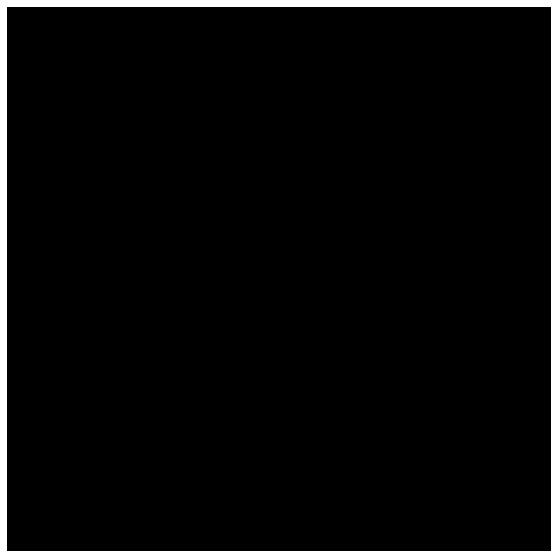

In [ ]:
# Hàm để hiển thị kết quả dự đoán lên colab trực tiếp
def show(path):
  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)

  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()
  
show('predictions.jpg')